# Setup

Start off by importing modules reading in my `.csv` data file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [2]:
dfCompost = pd.read_csv('GardenIO_Input_Compost.csv')

# Exploratory analyses

First off, let's look at the first few rows of the dataframe to make sure everything looks as expected:

In [3]:
dfCompost.head(5)

,Date,CompostMass,BoolCook,WeekDay
0,23/06/2020,306,0,Tue
1,24/06/2020,0,0,Wed
2,25/06/2020,741,0,Thu
3,26/06/2020,565,1,Fri
4,27/06/2020,322,0,Sat


Yep, all the columns are there and formats look fine! Before trying to crunch any numbers, let's see if all the items in the columns contain what I expected ('int's for CompostMass and BoolCook, 'str's for Date and WeekDay)

In [4]:
print('****Checking the Date column ')
for item in dfCompost.Date:
    if (type(item) is not str):
        print(type(item))

print('****Checking the CompostMass column ')        
for item in dfCompost.CompostMass:
    if (type(item) is not int):
        print(type(item))

print('****Checking the BoolCook column ')
for item in dfCompost.BoolCook:
    if (type(item) is not int):
        print(type(item))

        
print('****Checking the WeekDay column ')        
for item in dfCompost.WeekDay:
    if (type(item) is not str):
        print(type(item))

****Checking the Date column 
****Checking the CompostMass column 
****Checking the BoolCook column 
****Checking the WeekDay column 


Okay, everything checks out! Let's make some plots to see what the data looks like!

In [5]:
len(dfCompost.CompostMass)

43

(1, 45)

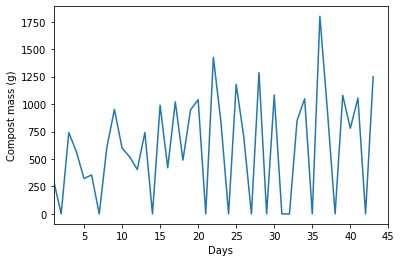

In [6]:
xVals=np.arange(1,len(dfCompost.CompostMass)+1,1)
sns.lineplot(x = xVals, y = dfCompost.CompostMass)
plt.xlabel('Days')
plt.ylabel('Compost mass (g)')

plt.xlim([1,45])

I can roughly see a trend of the compost mass going up, but the spikes down to zero once in a while make the whole thing pretty noisy! Let's see how this looks with a sliding average to clean this up a bit...

(1, 45)

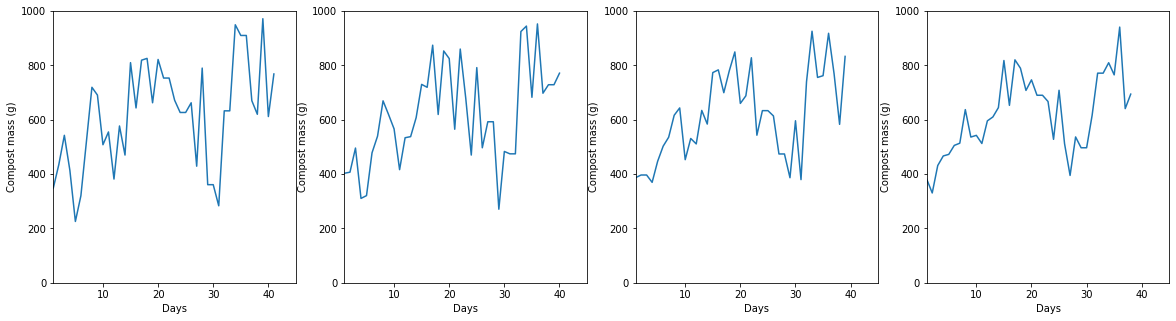

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(141)

len(running_mean(dfCompost.CompostMass.values, 3))
xVals = np.arange(1,42,1)
sns.lineplot(x = xVals, y = running_mean(dfCompost.CompostMass.values, 3))
plt.xlabel('Days')
plt.ylabel('Compost mass (g)')
plt.ylim([0,1000])
plt.xlim([1,45])

plt.subplot(142)
xVals = np.arange(1,41,1)
sns.lineplot(x = xVals, y = running_mean(dfCompost.CompostMass.values, 4))
plt.xlabel('Days')
plt.ylabel('Compost mass (g)')
plt.ylim([0,1000])
plt.xlim([1,45])

plt.subplot(143)
xVals = np.arange(1,40,1)
sns.lineplot(x = xVals, y = running_mean(dfCompost.CompostMass.values, 5))
plt.xlabel('Days')
plt.ylabel('Compost mass (g)')
plt.ylim([0,1000])
plt.xlim([1,45])

plt.subplot(144)
xVals = np.arange(1,39,1)
sns.lineplot(x = xVals, y = running_mean(dfCompost.CompostMass.values, 6))
plt.xlabel('Days')
plt.ylabel('Compost mass (g)')
plt.ylim([0,1000])
plt.xlim([1,45])

Looks like there really was a clear increase in the amount of compost going into the garden after the first 15 or so days. Let's have a look at how these values compare with the rest of the data that's in the dataset.

In [15]:
dfCompost.groupby('BoolCook')['CompostMass'].mean()

BoolCook
0     91.266667
1    891.178571
Name: CompostMass, dtype: float64

From a first glance, it looks like there's a big difference in the amount of compost between the amount of compost going into the garden on days that I do cook compared to days that I don't! But how are those two sets distributed? Is it reasonable to use their means as a form of comparison?

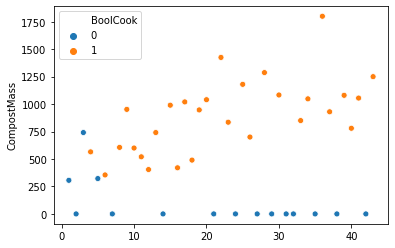

In [43]:
xVals=np.arange(1,len(dfCompost.CompostMass)+1,1)
len(xVals)
sns.scatterplot(x = xVals, y = dfCompost.CompostMass, hue = dfCompost.BoolCook)

From this plot, it's pretty obvious that the mean Compost Mass for days where BoolCook was 0 is absolutely meaningless! There are only 3 days where Compost Mass was >0 for that group and 12 zero values, simply because any day when I don't take the compost out to the garden will automatically have 0 values for both CompostMass and BoolCook. Even if I did just take the mean of the 3 values >0 g, it still wouldn't be a fair comparison since all of those values happened at the very beginning of the time series and after day 7 or so, I labeled every day with compost input as a day in which cooking happened.

Did I really start cooking more often after day 7? Probably not, but my definition of what constitutes a day with cooking did change as time went on. Initially, I was only counting days that I cooked fresh hot food, but then I realised that a good chunk of the material going to compost was actually peels and other leftovers from fresh fruit eating. After a few days with some internal debate whether to label a day as 1/0 on BoolCook, I simply gave up and ended up putting a 1 for every day after day 7 or so that had any compost input. So, it's not a meaningful signal at all, just a poorly specified variable that contains noise instead of data.

And how about the apparent increasing trend for Compost mass over time? Let's have a deeper look at that!

In [44]:
dfCompost.groupby('BoolCook')['CompostMass'].count()

BoolCook
0    15
1    28
Name: CompostMass, dtype: int64